<h3> LAB 12 - Filtragem Digital 3</h3>
<h5> Processamento Digital de Sinais I - TE352 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [1]:
# Inicializa os pacotes que serão utilizados
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy import signal

1) Plotar no mesmo eixo a resposta em frequência de quatro filtros de ordem 8 e freq. de corte=0.5. (butter, cheby1, cheby2, ellip).

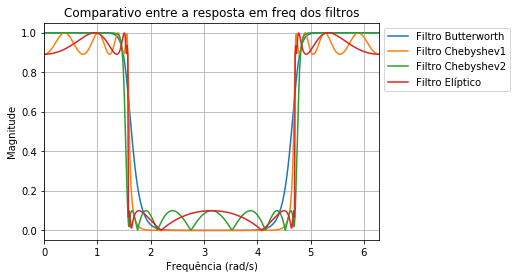

In [2]:
butter_b, butter_a = signal.butter(8,0.5)
w_butter,butter = signal.freqz(butter_b, butter_a, whole=True)

cheby1_b, cheby1_a = signal.cheby1(8,1,0.5)
w_cheby1, cheby1 = signal.freqz(cheby1_b, cheby1_a, whole=True)

cheby2_b, cheby2_a = signal.cheby2(8,20,0.5)
w_cheby2, cheby2 = signal.freqz(cheby2_b, cheby2_a, whole=True)

ellip_b, ellip_a = signal.ellip(8,1,20,0.5)
w_ellip, ellip = signal.freqz(ellip_b, ellip_a, whole=True)

plt.grid(True)
plt.plot(w_butter, abs(butter))
plt.plot(w_cheby1, abs(cheby1))
plt.plot(w_cheby2, abs(cheby2))
plt.plot(w_ellip, abs(ellip))
plt.legend(['Filtro Butterworth', 'Filtro Chebyshev1',
           'Filtro Chebyshev2', 'Filtro Elíptico'],loc='upper left', bbox_to_anchor=(1,1))
plt.title("Comparativo entre a resposta em freq dos filtros")
plt.ylabel('Magnitude')
plt.xlabel('Frequência (rad/s)')
plt.xlim (0, 2*np.pi)
plt.show()

2) Visualizar na mesma tela (com subplots) os diagramas de pólos e zeros.

In [ ]:
TF_butter = ctrl.tf(butter_b, butter_a)
TF_cheby1 = ctrl.tf(cheby1_b, cheby1_a)
TF_cheby2 = ctrl.tf(cheby2_b, cheby2_a)
TF_ellip = ctrl.tf(ellip_b, ellip_a)

<h5> <b> Filtro Butterworth </b> </h5>

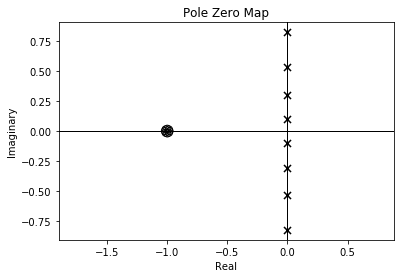

In [14]:
p_butter, z_butter = ctrl.pzmap(TF_butter, Plot=True)

<h5> <b> Filtro Chebyshev 1 </b> </h5>

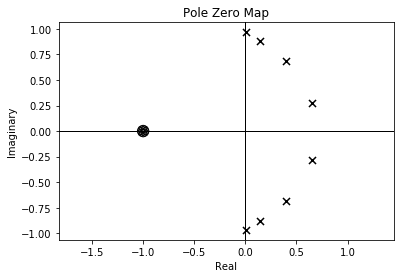

In [13]:
p_cheby1, z_cheby1 = ctrl.pzmap(TF_cheby1, Plot=True)

<h5> <b> Filtro Chebyshev 2 </b> </h5>

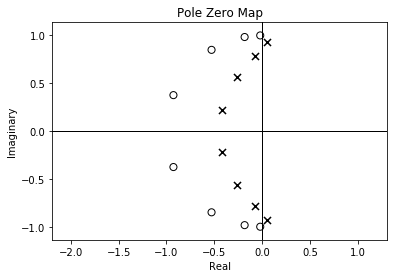

In [12]:
p_cheby2, z_cheby2 = ctrl.pzmap(TF_cheby2, Plot=True)

<h5> <b> Filtro Elíptico </b> </h5>

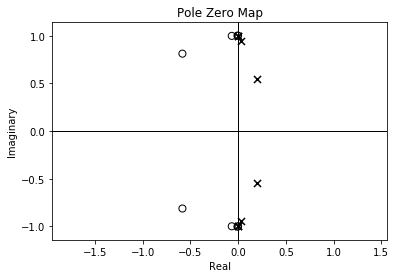

In [16]:
p_elipp, z_ellip = ctrl.pzmap(TF_ellip, Plot=True)

3) Filtrar o sinal: n=0:63; x=sin(0.1*pi*n)+cos(0.9*pi*n);

In [25]:
n = np.linspace(0,63,64)
x = np.sin(0.1*np.pi*n) + np.cos(0.9*np.pi*n)

x_butter = signal.lfilter(butter_b, butter_a, x)
x_cheby_1 = signal.lfilter(cheby1_b, cheby1_a, x)
x_cheby_2 = signal.lfilter(cheby2_b, cheby2_a, x)
x_ellip = signal.lfilter(ellip_b, ellip_a, x)

64


4) plotar o espectro do sinal x, o espectro do sinal filtrado por cada filtro, e as respostas em frequencia no mesmo eixo.

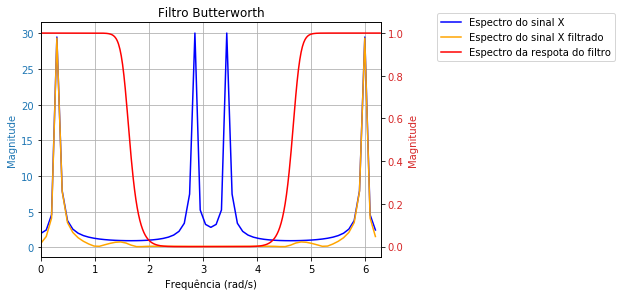

In [50]:
X = np.fft.fft(x)
w = 2*np.pi*n/64

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.grid(True)
ax1.set_xlabel('Frequência (rad/s)')
ax1.set_ylabel('Magnitude', color=color)
ax1.plot(w, abs(X), label = 'Espectro do sinal X', 
         color = 'Blue')
ax1.plot(w, abs(np.fft.fft(x_butter)), 
         label = 'Espectro do sinal X filtrado', 
         color = 'orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Magnitude', color=color)  
ax2.plot(w_butter, abs(butter), 
         label = 'Espectro da respota do filtro', 
         color = 'Red')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc='upper left', bbox_to_anchor=(1,1))

fig.tight_layout() 
plt.xlim (0, 2*np.pi)
plt.title("Filtro Butterworth")
plt.show()

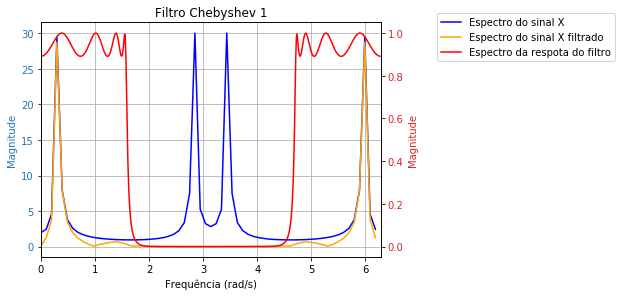

In [52]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.grid(True)
ax1.set_xlabel('Frequência (rad/s)')
ax1.set_ylabel('Magnitude', color=color)
ax1.plot(w, abs(X), label = 'Espectro do sinal X', 
         color = 'Blue')
ax1.plot(w, abs(np.fft.fft(x_cheby_1)), 
         label = 'Espectro do sinal X filtrado', 
         color = 'orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Magnitude', color=color)  
ax2.plot(w_cheby1, abs(cheby1), 
         label = 'Espectro da respota do filtro', 
         color = 'Red')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc='upper left', bbox_to_anchor=(1,1))

fig.tight_layout() 
plt.xlim (0, 2*np.pi)
plt.title("Filtro Chebyshev 1")
plt.show()

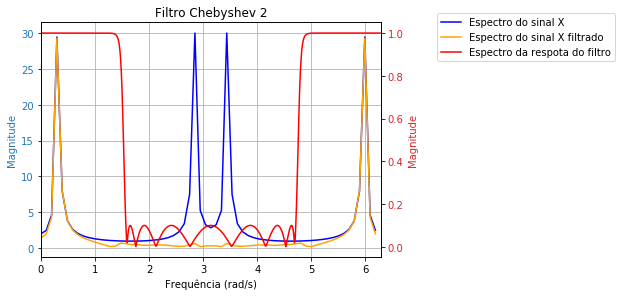

In [53]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.grid(True)
ax1.set_xlabel('Frequência (rad/s)')
ax1.set_ylabel('Magnitude', color=color)
ax1.plot(w, abs(X), label = 'Espectro do sinal X', 
         color = 'Blue')
ax1.plot(w, abs(np.fft.fft(x_cheby_2)), 
         label = 'Espectro do sinal X filtrado', 
         color = 'orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Magnitude', color=color)  
ax2.plot(w_cheby2, abs(cheby2), 
         label = 'Espectro da respota do filtro', 
         color = 'Red')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc='upper left', bbox_to_anchor=(1,1))

fig.tight_layout() 
plt.xlim (0, 2*np.pi)
plt.title("Filtro Chebyshev 2")
plt.show()

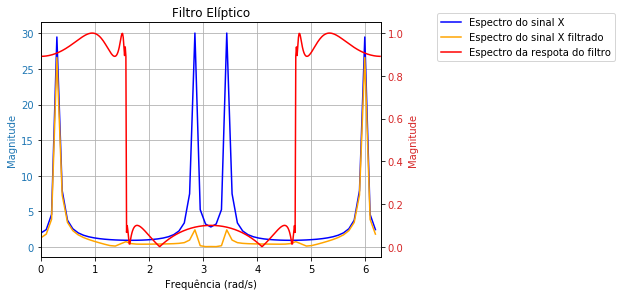

In [54]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.grid(True)
ax1.set_xlabel('Frequência (rad/s)')
ax1.set_ylabel('Magnitude', color=color)
ax1.plot(w, abs(X), label = 'Espectro do sinal X', 
         color = 'Blue')
ax1.plot(w, abs(np.fft.fft(x_ellip)), 
         label = 'Espectro do sinal X filtrado', 
         color = 'orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Magnitude', color=color)  
ax2.plot(w_ellip, abs(ellip), 
         label = 'Espectro da respota do filtro', 
         color = 'Red')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc='upper left', bbox_to_anchor=(1,1))

fig.tight_layout() 
plt.xlim (0, 2*np.pi)
plt.title("Filtro Elíptico")
plt.show()